# **Problem Statement**

Pada tahun 2019 di Wuhan, telah ditemukan suatu kasus pneunomia misterius yang diduga disebabkan oleh coronavirus yang kemudian akhirnya sejak tahun 2020 dunia ini dilanda pandemi COVID-19. 

Menurut WHO, COVID-19 adalah penyakit menular yang disebabkan oleh jenis *coronavirus* yang baru ditemukan.  Virus baru dan penyakit yang disebabkannya ini tidak dikenal sebelum mulainya wabah di Wuhan, Tiongkok, bulan Desember 2019. COVID-19 ini sekarang menjadi sebuah pandemi yang terjadi di banyak negara di seluruh dunia. 

Banyak solusi yang ditegakkan untuk membuat pandemi COVID-19 berakhir seperti melakukan isolasi dan vaksinasi. Dengan vaksinasi, tubuh akan lebih imun terhadap COVID-19 yang meringankan dampak COVID-19. 

Salah satu langkah efektif dalam meningkatkan imunitas tubuh manusia dari persebaran COVID-19 yang disebabkan oleh virus ini adalah dengan melakukan vaksinasi.

Saat ini, pemerintah Indonesia sedang gencar melakukan vaksinasi tahap 1 dan 2 dengan harapan apabila penduduk Indonesia telah melakukan vaksinasi full (tahap 1 dan 2) tingkat recovery penduduk Indonesia dari COVID-19 akan meningkat dan persebaran COVID-19 akan lebih tinggi tingkat penghambatan persebarannya.

Hal inilah yang melatarbelakangi kami untuk membuat suatu model prediksi jumlah hari seluruh populasi Indonesia menerima vaksinasi full tahap 1 dan 2.

Kami mengambil data dari https://tiny.cc/Datacovidjakarta, dimana data-data tersebut adalah data kesehatan penduduk DKI Jakarta selama pandemi COVID-19 berlangsung. Data ini kami jadikan sampel untuk membuat model prediksi jumlah hari seluruh populasi Indonesia menerima vaksinasi full tahap 1 dan 2, dengan pertimbangan DKI Jakarta adalah provinsi dengan yang kepadatan penduduk dan tingkat mobilitasnya paling tinggi sehingga diharapkan akan dapat memprediksi masalah kami dengan baik.


**Masalah** : *Prediksi Jumlah Hari Sampai Seluruh Populasi Indonesia Menerima Vaksinasi Full Tahap 1 dan 2 Berdasarkan Data Sampel dari Data Kesehatan Penduduk Jakarta Selama Pandemi COVID-19 Berlangsung*

**Keterangan dataset** : data yang digunakan dari tanggal 6 Januari 2022 hingga 6 Juli 2022

# **Data Cleaning**

## **1. Upload dan Cek Data yang Digunakan**



*   Sumber data yang kami berasal dari web:*https://tiny.cc/Datacovidjakarta*, kemudian kami olah sesuai kebutuhan (kami mengambil data dari *sheets* Data Suspek dll (Jakarta), RDT ab, RDT ag, Kasus PPLN dan Omicron, dan Vaksinasi yang kemudian di normalisasi dengan membagi masing-masing elemen fitur tersebut dengan jumlah penduduk Provinsi DKI Jakarta sekarang, 10.610.000) menjadi suatu *file* bernama data.csv yang kami simpan pada *link*: https://drive.google.com/file/d/1l6D8YFQjYL6dzqhB1lToZCBPSVC-1Kli/view?usp=sharing
*   Pertama, kami *upload file* data.csv kemudian kami tampilkan *headline*-nya.
*   Drop fitur yang tidak diperlukan maupun tipe data dari setiap kolom fitur.
*   Kemudian, kami cek jumlah elemen pada setiap kolom fitur maupun tipe data dari setiap kolom fitur.
*   Setelah itu, kami mengecek *missing value* dari masing-masing kolom fitur, karena pada kasus kami terdapat *missing value* dari beberapa kolom fitur, maka akan dilakukan *replacing value* pada elemen *missing value* tersebut.



In [ ]:
#import seluruh modul dan package yang dibutuhkan
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
import joblib
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv(r"/content/data.csv")  #baca dataset data.csv, state sbg dataframe data
df.head()                          #output headline dataframe data

,Tanggal,Day Count,Selesai Isolasi (Discarded),Selesai Isolasi (Discarded)/Total Penduduk,Isolasi di Rumah (Kontak Erat),Isolasi di Rumah (Kontak Erat)/Total Penduduk,Selesai Isolasi (Kontak Erat),Selesai Isolasi (Kontak Erat)/Total Penduduk,Isolasi di Rumah (Pelaku Perjalanan),Isolasi di Rumah (Pelaku Perjalanan)/Total Penduduk,...,Kasus Positif Aktif Non-PPLN,Kasus Positif Aktif Non-PPLN/Total Penduduk,Kasus Omicron Total PPLN,Kasus Omicron Total PPLN/Total Penduduk,Kasus Omicron Total Non-PPLN,Kasus Omicron Total Non-PPLN/Total Penduduk,Vaksinasi 1,Vaksinasi 1/Total Penduduk,Vaksinasi 2,Vaksinasi 2/Total Penduduk
0,6 January 2022,545.0,22561.0,0.002126,2536.0,0.000239,20025.0,0.001887,51042.0,0.004811,...,42003.0,0.003959,239.0,0.000023,41764.0,0.003936,11903113.0,1.121877,9322397.0,0.878643
1,7 January 2022,546.0,22561.0,0.002126,1808.0,0.000170,20753.0,0.001956,63841.0,0.006017,...,35473.0,0.003343,271.0,0.000026,35202.0,0.003318,11929959.0,1.124407,9328424.0,0.879211
2,8 January 2022,547.0,22561.0,0.002126,1883.0,0.000177,20678.0,0.001949,77939.0,0.007346,...,46530.0,0.004385,280.0,0.000026,46250.0,0.004359,11954112.0,1.126684,9334597.0,0.879792
3,9 January 2022,548.0,22562.0,0.002126,1855.0,0.000175,20707.0,0.001952,90496.0,0.008529,...,29895.0,0.002818,350.0,0.000033,29545.0,0.002785,11962482.0,1.127472,9336308.0,0.879954
4,10 January 2022,549.0,22562.0,0.002126,1713.0,0.000161,20849.0,0.001965,102711.0,0.009681,...,40384.0,0.003806,350.0,0.000033,40034.0,0.003773,11968170.0,1.128008,9337035.0,0.880022


In [ ]:
df=df.drop(['Selesai Isolasi (Discarded)','Isolasi di Rumah (Kontak Erat)','Selesai Isolasi (Kontak Erat)',
            'Isolasi di Rumah (Pelaku Perjalanan)','Selesai Isolasi (Pelaku Perjalanan)','Isolasi di RS (Probable)',
            'Meninggal (Probable)','Selesai Isolasi (Probable)','Isolasi di RS (Suspek)','Isolasi di Rumah (Suspek)',
            'Meninggal (Suspek)','Selesai Isolasi (Suspek)','Reaktif','Non-Reaktif','Tes Harian','Positif  Harian',
            'Negatif Harian','Kasus Positif Harian PPLN','Kasus Positif Harian Non-PPLN','Kasus Positif Aktif PPLN',
            'Kasus Positif Aktif Non-PPLN','Kasus Omicron Total PPLN','Kasus Omicron Total Non-PPLN','Vaksinasi 1','Vaksinasi 2'],axis=1) #drop fitur-fitur yang tidak ingin digunakan untuk memprediksi

In [ ]:
df.info() #menampilkan informasi dari dataframe, baik mengenai jumlah elemen pada setiap kolom maupun tipe data dari setiap kolom.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 27 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Tanggal                                              182 non-null    object 
 1   Day Count                                            182 non-null    float64
 2   Selesai Isolasi (Discarded)/Total Penduduk           182 non-null    float64
 3   Isolasi di Rumah (Kontak Erat)/Total Penduduk        182 non-null    float64
 4   Selesai Isolasi (Kontak Erat)/Total Penduduk         182 non-null    float64
 5   Isolasi di Rumah (Pelaku Perjalanan)/Total Penduduk  182 non-null    float64
 6   Selesai Isolasi (Pelaku Perjalanan)/Total Penduduk   182 non-null    float64
 7   Isolasi di RS (Probable)/Total Penduduk              182 non-null    float64
 8   Meninggal (Probable)/Total Penduduk                  182 non-null    f

In [ ]:
df.isnull().sum() #menampilkan jumlah missing value dalam dataframe

Tanggal                                                0
Day Count                                              0
Selesai Isolasi (Discarded)/Total Penduduk             0
Isolasi di Rumah (Kontak Erat)/Total Penduduk          0
Selesai Isolasi (Kontak Erat)/Total Penduduk           0
Isolasi di Rumah (Pelaku Perjalanan)/Total Penduduk    0
Selesai Isolasi (Pelaku Perjalanan)/Total Penduduk     0
Isolasi di RS (Probable)/Total Penduduk                0
Meninggal (Probable)/Total Penduduk                    0
Selesai Isolasi (Probable)/Total Penduduk              0
Isolasi di RS (Suspek)/Total Penduduk                  0
Isolasi di Rumah (Suspek)/Total Penduduk               0
Meninggal (Suspek)/Total Penduduk                      0
Selesai Isolasi (Suspek)/Total Penduduk                0
Reaktif/Total Penduduk                                 0
Non-Reaktif/Total Penduduk                             0
Tes Harian/Total Penduduk                              0
Positif  Harian/Total Penduduk 

## **2. Cleaning Data dengan Replacing Missing Value**



*   Karena semua tipe data tiap kolom fitur adalah bertipe numerik (kecuali kolom tanggal, kolom fitur ini tidak digunakan), maka dapat dilakukan *replacing missing value* menggunakan metode IQR.
*   Pertama, kami membuat *array* bernama *numerical_colums* untuk menyimpan data kolom fitur yang akan di-*replace* *missing value*-nya.
*   Kemudian, kami melakukan *replacing missing value* menggunakan metode IQR. Idenya adalah mencari quantile pertama (kami set sebagai Q1) dan ketiga (kami set sebagai Q3). Setelah itu, kami state *lower_bound*=$$Q1 - 1.5 * IQR$$ dan *upper_bound*=$$Q3 + 1.5 * IQR$$ untuk *replacing missing value*. *Replacing missing value* dengan metode ini akan mengganti *missing value* dengan *lower_bound* atau *upper_bound*.
*   Setelah itu, cek kembali terlihat tidak ada *missing value* pada kolom fitur data yang akan kami gunakan. Dengan demikian, proses *data cleaning* selesai.



In [ ]:
numerical_columns = ['Day Count',
       'Selesai Isolasi (Discarded)/Total Penduduk', 'Isolasi di Rumah (Kontak Erat)/Total Penduduk',
       'Selesai Isolasi (Kontak Erat)/Total Penduduk', 'Isolasi di Rumah (Pelaku Perjalanan)/Total Penduduk',
       'Selesai Isolasi (Pelaku Perjalanan)/Total Penduduk', 'Isolasi di RS (Probable)/Total Penduduk',
       'Meninggal (Probable)/Total Penduduk', 'Selesai Isolasi (Probable)/Total Penduduk',
       'Isolasi di RS (Suspek)/Total Penduduk', 'Isolasi di Rumah (Suspek)/Total Penduduk',
       'Meninggal (Suspek)/Total Penduduk', 'Selesai Isolasi (Suspek)/Total Penduduk', 'Reaktif/Total Penduduk',
       'Non-Reaktif/Total Penduduk', 'Tes Harian/Total Penduduk', 'Positif  Harian/Total Penduduk', 'Negatif Harian/Total Penduduk',
       'Kasus Positif Harian PPLN/Total Penduduk', 'Kasus Positif Harian Non-PPLN/Total Penduduk',
       'Kasus Positif Aktif PPLN/Total Penduduk', 'Kasus Positif Aktif Non-PPLN/Total Penduduk',
       'Kasus Omicron Total PPLN/Total Penduduk', 'Kasus Omicron Total Non-PPLN/Total Penduduk',
       'Vaksinasi 1/Total Penduduk', 'Vaksinasi 2/Total Penduduk'] #menyimpan kolom-kolom integer dan float ke dalam variabel numerical_columns

In [ ]:
for i in range(len(numerical_columns)):
  Q1 = np.quantile(df[numerical_columns[i]], .25)
  Q3 = np.quantile(df[numerical_columns[i]], .75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_cound = Q3 + 1.5 * IQR
  
  #cek data outlier
  outmax=df.loc[df[numerical_columns[i]] > upper_cound]
  outmin=df.loc[df[numerical_columns[i]] < lower_bound]
  if len(outmax)!=0:
    for j in range(len(outmax.index)):
      df.drop(outmax.index[j],inplace=True)
  if len(outmin)!=0:
    for j in range(len(outmin.index)):
      df.drop(outmin.index[j],inplace=True)

In [ ]:
df.isnull().sum() #menampilkan jumlah missing value dalam dataframe untuk pengecekan kembali

Tanggal                                                0
Day Count                                              0
Selesai Isolasi (Discarded)/Total Penduduk             0
Isolasi di Rumah (Kontak Erat)/Total Penduduk          0
Selesai Isolasi (Kontak Erat)/Total Penduduk           0
Isolasi di Rumah (Pelaku Perjalanan)/Total Penduduk    0
Selesai Isolasi (Pelaku Perjalanan)/Total Penduduk     0
Isolasi di RS (Probable)/Total Penduduk                0
Meninggal (Probable)/Total Penduduk                    0
Selesai Isolasi (Probable)/Total Penduduk              0
Isolasi di RS (Suspek)/Total Penduduk                  0
Isolasi di Rumah (Suspek)/Total Penduduk               0
Meninggal (Suspek)/Total Penduduk                      0
Selesai Isolasi (Suspek)/Total Penduduk                0
Reaktif/Total Penduduk                                 0
Non-Reaktif/Total Penduduk                             0
Tes Harian/Total Penduduk                              0
Positif  Harian/Total Penduduk 

# **Exploratory Data Analysis and Preprocessing**



## **1. Exploratory Data Analysis**


*   Megganti nama kolom 'Day Count' menjadi 'DC' agar mempermudah penulisan. Lalu, tampilkan informasi statistik dari dataframe agar dapat menemukan insight mengenai apa yang harus dilakukan pada data tersebut selanjutnya.
*   Cek korelasi antar data di dataframe df yang kemudian ditampilkan hasil pengecekan korelasinya.
*  Hapus kolom-kolom yang menghasilkan NaN (Not a Number) pada korelasi dari tiap kolom dataframe pada dataframe yang kemudian lakukan pengecekan kembali korelasinya untuk memastikan.
*  Lihat korelasi masing-masing fitur numerik melalui heatmap untuk mengetahui fitur apa saja yang berpengaruh terhadap variabel target.
*  Cari quantile dari korelasi nya lalu cari fitur yang korelasi terhadap output yaitu 'DC' lebih dari quantile korelasi nya untuk pemilihan fitur.
*  Cari median dari korelasi nya lalu cari fitur yang korelasi terhadap output yaitu 'DC' lebih dari mediankorelasi nya untuk pemilihan fitur.



In [ ]:
df.rename(columns = {'Day Count': 'DC'}, inplace=True) #megganti nama kolom 'Day Count' menjadi 'DC'

In [ ]:
df.describe() #menampilkan informasi statistik dari dataframe

,DC,Selesai Isolasi (Discarded)/Total Penduduk,Isolasi di Rumah (Kontak Erat)/Total Penduduk,Selesai Isolasi (Kontak Erat)/Total Penduduk,Isolasi di Rumah (Pelaku Perjalanan)/Total Penduduk,Selesai Isolasi (Pelaku Perjalanan)/Total Penduduk,Isolasi di RS (Probable)/Total Penduduk,Meninggal (Probable)/Total Penduduk,Selesai Isolasi (Probable)/Total Penduduk,Isolasi di RS (Suspek)/Total Penduduk,...,Positif Harian/Total Penduduk,Negatif Harian/Total Penduduk,Kasus Positif Harian PPLN/Total Penduduk,Kasus Positif Harian Non-PPLN/Total Penduduk,Kasus Positif Aktif PPLN/Total Penduduk,Kasus Positif Aktif Non-PPLN/Total Penduduk,Kasus Omicron Total PPLN/Total Penduduk,Kasus Omicron Total Non-PPLN/Total Penduduk,Vaksinasi 1/Total Penduduk,Vaksinasi 2/Total Penduduk
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,3.600000e+01,...,3.600000e+01,36.000000,3.600000e+01,36.000000,36.000000,36.000000,36.00000,36.000000,36.000000,36.000000
mean,678.972222,0.002164,0.000078,0.002087,0.007094,0.222346,0.000005,0.002143,0.001087,2.495167e-06,...,3.576444e-06,0.001122,1.152139e-06,0.001121,0.000007,0.001114,0.00018,0.000934,1.180814,1.007634
std,12.433793,0.000001,0.000030,0.000029,0.002119,0.008227,0.000001,0.000000,0.000005,1.137841e-06,...,1.651077e-06,0.000371,8.682703e-07,0.000371,0.000003,0.000373,0.00000,0.000373,0.000325,0.001201
min,658.000000,0.002163,0.000021,0.002034,0.003980,0.208856,0.000003,0.002143,0.001079,5.660000e-07,...,9.430000e-07,0.000531,0.000000e+00,0.000530,0.000004,0.000520,0.00018,0.000340,1.180611,1.005753
25%,666.750000,0.002163,0.000052,0.002064,0.004980,0.214201,0.000004,0.002143,0.001082,1.626250e-06,...,2.709500e-06,0.000834,4.240000e-07,0.000833,0.000005,0.000824,0.00018,0.000644,1.180611,1.006144
50%,680.500000,0.002164,0.000084,0.002080,0.007574,0.222626,0.000005,0.002143,0.001086,2.498000e-06,...,3.299000e-06,0.001044,1.131000e-06,0.001042,0.000007,0.001034,0.00018,0.000854,1.180611,1.008005
75%,689.250000,0.002165,0.000101,0.002112,0.008513,0.229902,0.000006,0.002143,0.001091,3.534250e-06,...,3.840750e-06,0.001306,1.508000e-06,0.001305,0.000010,0.001299,0.00018,0.001119,1.180895,1.008625
max,698.000000,0.002167,0.000132,0.002142,0.010348,0.233661,0.000007,0.002143,0.001094,4.430000e-06,...,9.519000e-06,0.001969,3.582000e-06,0.001968,0.000013,0.001963,0.00018,0.001783,1.181704,1.009279


In [ ]:
dfcorr = df.corr()  #cek korelasi antar data di dataframe df (karena semua fiturnya data numerik)
dfcorr                 #tampilkan korelasinya

,DC,Selesai Isolasi (Discarded)/Total Penduduk,Isolasi di Rumah (Kontak Erat)/Total Penduduk,Selesai Isolasi (Kontak Erat)/Total Penduduk,Isolasi di Rumah (Pelaku Perjalanan)/Total Penduduk,Selesai Isolasi (Pelaku Perjalanan)/Total Penduduk,Isolasi di RS (Probable)/Total Penduduk,Meninggal (Probable)/Total Penduduk,Selesai Isolasi (Probable)/Total Penduduk,Isolasi di RS (Suspek)/Total Penduduk,...,Positif Harian/Total Penduduk,Negatif Harian/Total Penduduk,Kasus Positif Harian PPLN/Total Penduduk,Kasus Positif Harian Non-PPLN/Total Penduduk,Kasus Positif Aktif PPLN/Total Penduduk,Kasus Positif Aktif Non-PPLN/Total Penduduk,Kasus Omicron Total PPLN/Total Penduduk,Kasus Omicron Total Non-PPLN/Total Penduduk,Vaksinasi 1/Total Penduduk,Vaksinasi 2/Total Penduduk
DC,1.000000,0.895675,0.715492,-0.701925,-0.701678,0.997269,0.562494,NaN,0.990666,0.540315,...,0.626851,-0.253023,0.287430,-0.253676,0.728467,-0.258164,NaN,-0.258164,0.769453,0.993568
Selesai Isolasi (Discarded)/Total Penduduk,0.895675,1.000000,0.747591,-0.731045,-0.842043,0.888046,0.329974,NaN,0.922080,0.209903,...,0.724786,-0.357064,0.411369,-0.357999,0.867665,-0.363173,NaN,-0.363174,0.951663,0.862274
Isolasi di Rumah (Kontak Erat)/Total Penduduk,0.715492,0.747591,1.000000,-0.999698,-0.754693,0.728633,0.245221,NaN,0.750154,0.456481,...,0.413592,-0.554081,0.375697,-0.554917,0.830216,-0.559218,NaN,-0.559218,0.675433,0.736258
Selesai Isolasi (Kontak Erat)/Total Penduduk,-0.701925,-0.731045,-0.999698,1.000000,0.744187,-0.715709,-0.239716,NaN,-0.736559,-0.461202,...,-0.398089,0.556034,-0.370758,0.556859,-0.820829,0.561085,NaN,0.561086,-0.658701,-0.724496
Isolasi di Rumah (Pelaku Perjalanan)/Total Penduduk,-0.701678,-0.842043,-0.754693,0.744187,1.000000,-0.724400,0.066521,NaN,-0.781263,-0.082945,...,-0.533129,0.494025,-0.478295,0.495106,-0.875570,0.499918,NaN,0.499918,-0.838298,-0.665424
Selesai Isolasi (Pelaku Perjalanan)/Total Penduduk,0.997269,0.888046,0.728633,-0.715709,-0.724400,1.000000,0.539652,NaN,0.993544,0.559706,...,0.606576,-0.268260,0.298420,-0.268937,0.742670,-0.273481,NaN,-0.273482,0.753596,0.993370
Isolasi di RS (Probable)/Total Penduduk,0.562494,0.329974,0.245221,-0.239716,0.066521,0.539652,1.000000,NaN,0.461804,0.633316,...,0.284501,0.123450,0.034873,0.123360,0.156328,0.121852,NaN,0.121852,0.215354,0.596231
Meninggal (Probable)/Total Penduduk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Selesai Isolasi (Probable)/Total Penduduk,0.990666,0.922080,0.750154,-0.736559,-0.781263,0.993544,0.461804,NaN,1.000000,0.495256,...,0.637944,-0.294998,0.330959,-0.295750,0.787124,-0.300533,NaN,-0.300533,0.804408,0.980210
Isolasi di RS (Suspek)/Total Penduduk,0.540315,0.209903,0.456481,-0.461202,-0.082945,0.559706,0.633316,NaN,0.495256,1.000000,...,0.089482,-0.110158,0.085796,-0.110350,0.219718,-0.111600,NaN,-0.111600,-0.003434,0.619188


In [ ]:
df.drop(['Meninggal (Suspek)/Total Penduduk'],axis=1) #buang fitur 'Meninggal (Suspek/Total Penduduk)'

,Tanggal,DC,Selesai Isolasi (Discarded)/Total Penduduk,Isolasi di Rumah (Kontak Erat)/Total Penduduk,Selesai Isolasi (Kontak Erat)/Total Penduduk,Isolasi di Rumah (Pelaku Perjalanan)/Total Penduduk,Selesai Isolasi (Pelaku Perjalanan)/Total Penduduk,Isolasi di RS (Probable)/Total Penduduk,Meninggal (Probable)/Total Penduduk,Selesai Isolasi (Probable)/Total Penduduk,...,Positif Harian/Total Penduduk,Negatif Harian/Total Penduduk,Kasus Positif Harian PPLN/Total Penduduk,Kasus Positif Harian Non-PPLN/Total Penduduk,Kasus Positif Aktif PPLN/Total Penduduk,Kasus Positif Aktif Non-PPLN/Total Penduduk,Kasus Omicron Total PPLN/Total Penduduk,Kasus Omicron Total Non-PPLN/Total Penduduk,Vaksinasi 1/Total Penduduk,Vaksinasi 2/Total Penduduk
113,29 April 2022,658.0,0.002163,0.000080,0.002083,0.008240,0.208856,0.000004,0.002143,0.001079,...,2.733000e-06,0.001540,1.320000e-06,0.001539,0.000008,0.001531,0.00018,0.001351,1.180611,1.005753
114,30 April 2022,659.0,0.002163,0.000081,0.002082,0.008348,0.209324,0.000004,0.002143,0.001080,...,3.016000e-06,0.001118,3.582000e-06,0.001114,0.000007,0.001107,0.00018,0.000927,1.180611,1.005753
115,1 May 2022,660.0,0.002163,0.000082,0.002081,0.008368,0.209858,0.000004,0.002143,0.001080,...,2.828000e-06,0.001039,1.131000e-06,0.001037,0.000007,0.001030,0.00018,0.000850,1.180611,1.005753
116,2 May 2022,661.0,0.002163,0.000072,0.002091,0.008163,0.210556,0.000003,0.002143,0.001080,...,2.922000e-06,0.000868,0.000000e+00,0.000868,0.000006,0.000861,0.00018,0.000682,1.180611,1.005994
117,3 May 2022,662.0,0.002163,0.000067,0.002097,0.007889,0.211161,0.000003,0.002143,0.001081,...,9.430000e-07,0.000565,1.890000e-07,0.000564,0.000005,0.000559,0.00018,0.000379,1.180611,1.006034
118,4 May 2022,663.0,0.002163,0.000056,0.002108,0.007670,0.211836,0.000003,0.002143,0.001081,...,1.602000e-06,0.000806,1.890000e-07,0.000805,0.000005,0.000801,0.00018,0.000621,1.180611,1.006109
119,5 May 2022,664.0,0.002163,0.000044,0.002119,0.007581,0.212518,0.000003,0.002143,0.001081,...,3.582000e-06,0.001162,1.979000e-06,0.001160,0.000004,0.001156,0.00018,0.000976,1.180611,1.006117
120,6 May 2022,665.0,0.002163,0.000034,0.002129,0.007526,0.213174,0.000003,0.002143,0.001082,...,2.451000e-06,0.001297,1.131000e-06,0.001296,0.000005,0.001291,0.00018,0.001111,1.180611,1.006126
121,7 May 2022,666.0,0.002163,0.000032,0.002131,0.007567,0.213757,0.000003,0.002143,0.001082,...,1.885000e-06,0.001276,2.830000e-07,0.001276,0.000004,0.001272,0.00018,0.001092,1.180611,1.006138
122,8 May 2022,667.0,0.002163,0.000032,0.002132,0.007636,0.214349,0.000003,0.002143,0.001083,...,2.168000e-06,0.001368,4.710000e-07,0.001368,0.000004,0.001364,0.00018,0.001184,1.180611,1.006146


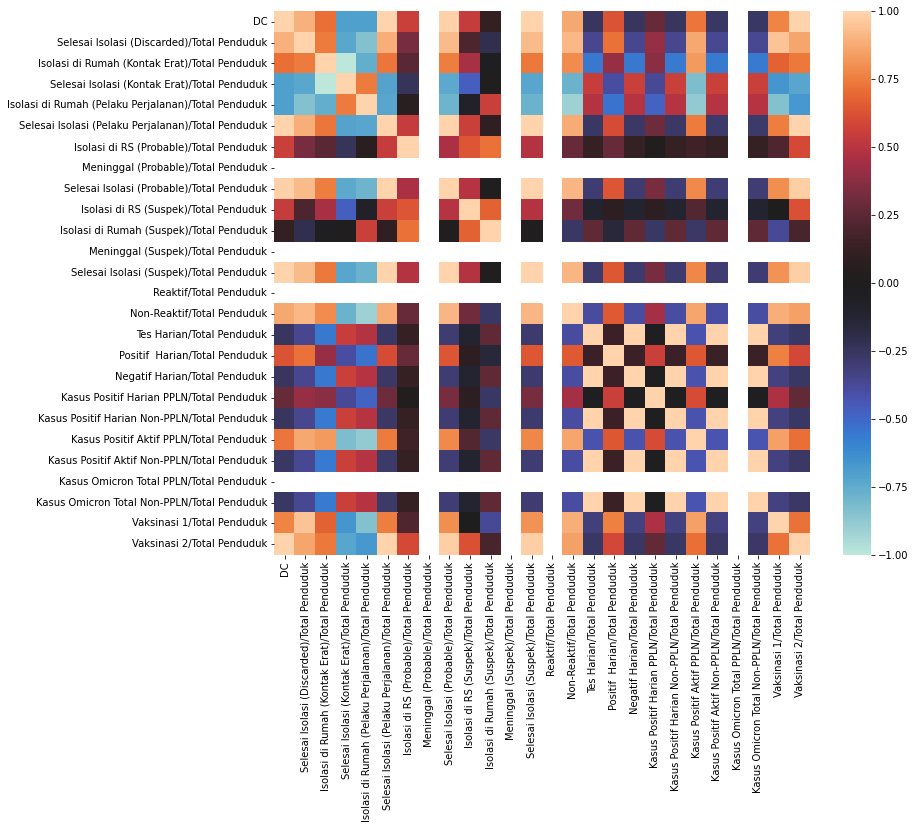

In [ ]:
# melihat korelasi masing-masing fitur numerik melalui heatmap
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, center=0)
plt.show()

In [ ]:
corr_quantile = abs(df.corr().DC[:26]).quantile(.75) #cari quantile korelasi nya
corr_quantile = df.corr().DC[abs(df.corr().DC)>corr_quantile] #cari fitur yang korelasi thd output lebih dari quantile korelasi nya
print('Fitur yang korelasi terhadap DC (Day Count) yang lebih dari quantilenya adalah \n', corr_quantile,'\n')

Fitur yang korelasi terhadap DC (Day Count) yang lebih dari quantilenya adalah 
 DC                                                    1.000000
Selesai Isolasi (Discarded)/Total Penduduk            0.895675
Selesai Isolasi (Pelaku Perjalanan)/Total Penduduk    0.997269
Selesai Isolasi (Probable)/Total Penduduk             0.990666
Selesai Isolasi (Suspek)/Total Penduduk               0.993278
Vaksinasi 2/Total Penduduk                            0.993568
Name: DC, dtype: float64 



In [ ]:
corr_med = abs(df.corr().DC[:26]).median()       #cari median korelasi nya
corr_med = df.corr().DC[abs(df.corr().DC)>corr_med]   #cari fitur yang korelasi thd output lebih dari median korelasi nya
print('Fitur yang korelasi terhadap DC (Day Count) yang lebih dari mediannya adalah \n', corr_med,'\n')

Fitur yang korelasi terhadap DC (Day Count) yang lebih dari mediannya adalah 
 DC                                                    1.000000
Selesai Isolasi (Discarded)/Total Penduduk            0.895675
Isolasi di Rumah (Kontak Erat)/Total Penduduk         0.715492
Selesai Isolasi (Kontak Erat)/Total Penduduk         -0.701925
Selesai Isolasi (Pelaku Perjalanan)/Total Penduduk    0.997269
Selesai Isolasi (Probable)/Total Penduduk             0.990666
Selesai Isolasi (Suspek)/Total Penduduk               0.993278
Non-Reaktif/Total Penduduk                            0.871521
Kasus Positif Aktif PPLN/Total Penduduk               0.728467
Vaksinasi 1/Total Penduduk                            0.769453
Vaksinasi 2/Total Penduduk                            0.993568
Name: DC, dtype: float64 



## **2. Data Prepocessing**

*   Mengambil fitur-fitur dataset yang berkorelasi terhadap DC (Days Count) lebih dari quantilenya. Lalu gunakan label encoder untuk mengubah data menjadi label agar bisa memulai modelling
*   Pisahkan fitur-fitur yang akan digunakan untuk prediksi dan variabel target sebagai X dan Y. Variabel Y akan berisi kolom DC (Days Count) dan X akan berisi sisa fitur yang sudah dipilih sebelumnya
*   Dilakukan scalling untuk seluruh data karena semuanya bersifat numerik. Dipilih minmax scaler yaitu normalisasi data. Data diubah menyesuaikan dalam suatu rentang minimal (bernilai 0)hingga maksimal (bernilai 1). Berikut perhitungannya 
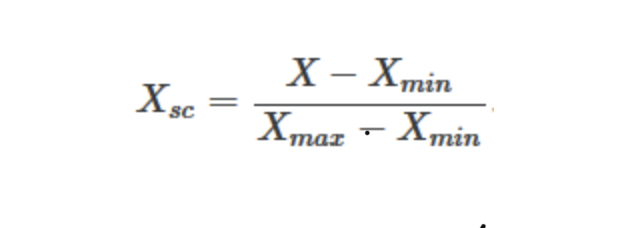




In [ ]:
#mengubah setiap nilai dalam kolom yang ada pada dataframe data menjadi nilai yang mempunyai label
from sklearn.preprocessing import LabelEncoder
data = df[['Selesai Isolasi (Discarded)/Total Penduduk','Selesai Isolasi (Pelaku Perjalanan)/Total Penduduk',
           'Selesai Isolasi (Probable)/Total Penduduk','Selesai Isolasi (Suspek)/Total Penduduk','Vaksinasi 2/Total Penduduk','DC']]
labelencoder=LabelEncoder()
for column in data.columns:
    data[column] = labelencoder.fit_transform(data[column])

In [ ]:
X = data.drop(['DC'],axis=1) #hilangkan kolom 'DC' dari dataframe data lalu simpan dalam X
Y = data.DC   #simpan kolom DC pada dataframe data lalu simpan dalam Y

In [ ]:
#normalisasi data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(data))
MinMaxScaler()
print(scaler.data_max_)
print(scaler.transform(data))

MinMaxScaler()
[10. 35. 31. 35. 33. 35.]
[[0.         0.         0.         0.         0.         0.        ]
 [0.1        0.02857143 0.03225806 0.02857143 0.         0.02857143]
 [0.1        0.05714286 0.06451613 0.05714286 0.         0.05714286]
 [0.1        0.08571429 0.09677419 0.08571429 0.03030303 0.08571429]
 [0.1        0.11428571 0.12903226 0.11428571 0.06060606 0.11428571]
 [0.1        0.14285714 0.16129032 0.14285714 0.09090909 0.14285714]
 [0.1        0.17142857 0.19354839 0.17142857 0.12121212 0.17142857]
 [0.1        0.2        0.22580645 0.2        0.15151515 0.2       ]
 [0.1        0.22857143 0.25806452 0.22857143 0.18181818 0.22857143]
 [0.2        0.25714286 0.29032258 0.25714286 0.21212121 0.25714286]
 [0.3        0.28571429 0.32258065 0.28571429 0.24242424 0.28571429]
 [0.4        0.31428571 0.32258065 0.31428571 0.27272727 0.31428571]
 [0.4        0.34285714 0.32258065 0.34285714 0.3030303  0.34285714]
 [0.4        0.37142857 0.35483871 0.37142857 0.33333333 0.371

# **Modelling**

## **1. Buat Data Train-Test**

In [ ]:
#Buat data train test dengan perbandingan train:test adalah 8:2
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=50)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape       #cek bentuk dari masing-masing elemen data train test

((28, 5), (8, 5), (28,), (8,))

## **2. Buat Model Linear Regression**

In [ ]:
from sklearn import linear_model            #impor linear_model dari modul sklearn
linreg = linear_model.LinearRegression()    #buat model linear regresi (fungsi)

In [ ]:
linreg.fit(X_train, Y_train)                #fit data X dan Y training ke model linear regresi
print('Coefficients: ', linreg.coef_)       #output coef regresi dengan modul sklearn
print('y-Intercept: ', linreg.intercept_)   #output intercept dengan modul sklearn

Coefficients:  [ 2.48386371e-15  5.00000000e-01  1.66533454e-16  5.00000000e-01
 -5.55111512e-17]
y-Intercept:  7.105427357601002e-15


In [ ]:
y_hat = linreg.predict(X_test) #mencari nilai y prediksi dari model linreg

## **3. Evaluasi Model Linear Regression**

### **a. MAE dan MSE**

In [ ]:
from sklearn.metrics import r2_score
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - Y_test))) #menampilkan Mean Absolute Error (MAE)
print("Residual sum of squares: %.2f" % np.mean((y_hat - Y_test) ** 2))   #menampilan Residual Sum of Squares (MSE)

Mean absolute error: 0.00
Residual sum of squares: 0.00


### **b. Uji Variance dan R2-Score**

In [ ]:
print("Variance score: %.2f" % linreg.score(X_test, Y_test)) #menampilkan variansi
print("R2-score: %.2f" % r2_score(Y_test, y_hat)) #menampilkan skor R2 (koefisien determinasi)

Variance score: 1.00
R2-score: 1.00


## **4. Implementasi dan Analisis hasil Model**

### **a. Implementasi Hasil Model**

In [ ]:
from sys import ps1
#formula model regresi sesuai dengan input penduduk tiap negara dikarenakan penduduk setiap waktu terus bertambah
p1 = int(input('Masukkan jumlah penduduk negara Indonesia saat ini: '))
p1 = p1/10610000   #normasilisasi input dengan jumlah penduduk provinsi DKI Jakarta saat ini
p2 = p1
p3 = p1
p4 = p1
p5 = p1
def regres(p1,p2,p3,p4,p5):
    return p1*linreg.coef_[0] + p2*linreg.coef_[1] + p3*linreg.coef_[2] +  p4*linreg.coef_[3] +  p5*linreg.coef_[4] + linreg.intercept_

print('Populasi di {} akan mendapatkan full vaksinasi tahap  1 dan 2 dalam dengan membutuhkan waktu sebanyak {} hari (setelah tanggal 6 Juli 2022) berdasarkan data sampel dari provinsi DKI Jakarta.'.format('Indonesia',int(regres(p1,p2,p3,p4,p5))))

Masukkan jumlah penduduk negara Indonesia saat ini: 278752361
Populasi di Indonesia akan mendapatkan full vaksinasi tahap  1 dan 2 dalam dengan membutuhkan waktu sebanyak 26 hari (setelah tanggal 6 Juli 2022) berdasarkan data sampel dari provinsi DKI Jakarta.


### **b. Analisis Hasil Model**

Dengan Jumlah penduduk Indonesia saat ini sebanyak 278.752.361 jiwa, model yang kami buat memprediksi bahwa masyarakat Indonesia akan mendapatkan vaksinasi full 1&2 pada 26 hari setelah tanggal 6 Juli 2022, yakni pada tanggal 1 Agustus 2022. Artinya, pada tanggal 1 Agustus 2022 diprediksi tingkat recovery penduduk Indonesia dari COVID-19 akan meningkat dan persebaran COVID-19 akan lebih tinggi tingkat penghambatan persebarannya.

# **Conclusion**

Model yang kami buat menghasilkan evaluasi model sebagai berikut:
* Mean absolute error: 0.00
* Residual sum of squares: 0.00
* Variance score: 1.00
* R2-score: 1.00

Artinya, permodelan yang kami lakukan untuk **Prediksi Jumlah Hari Sampai Seluruh Populasi Indonesia Mendapatkan Full Vaksinasi Tahap 1 dan 2** sangat baik. Hal tersebut dikarenakan model tersebut memperoleh hasil Mean Absolute Error dan Residual Sum of Squares yang bernilai 0 artinya tidak ada error dalam model kami. Kemudian, oleh karena Variance Score dan R2-Score yang bernilai 1 yaitu nilai maksimal pada Variance Score dan R2-Score, artinya variabel independen memberikan hampir semua informasi yang dibutuhkan untuk memprediksi variabel dependen/target kami yaitu Day Count (jumlah hari). Kemudian, menurut Chin (1998), nilai R-Square dikategorikan kuat jika lebih dari 0,67, moderat jika lebih dari 0,33 tetapi lebih rendah dari 0,67, dan lemah jika lebih dari 0,19 tetapi lebih rendah dari 0,33. Oleh karena itu, model kami termasuk kedalam kategori kuat. Berdasarkan uraian di atas, dengan jumlah penduduk Indonesia saat ini sebanyak 278.752.361 jiwa, hasil prediksi model yang kami buat bahwa masyarakat Indonesia akan mendapatkan vaksinasi full tahap 1 dan 2 pada 26 hari setelah tanggal 6 Juli 2022, yakni pada tanggal 1 Agustus 2022 memiliki nilai keakuratan yang sangat tinggi.

# **Daftar Pustaka**

Aggarwal, C. C. (2015). Data mining: the textbook. Springer.

Bishop, C. M. (2006). Pattern recognition and machine learning. springer. 

Goyal, S. (2021, August 16). Evaluation metrics for regression models. Medium. Retrieved July 9, 2022, from https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-models-c91c65d73af 

Jake V. (2016). Phyton Data Science Handbook, O’Reilly Media, Inc

Saldago, C., Proenca, H. M., Viera S. (2016), Missing Data, DOI: 10.1007/978-3-319-43742-2_13

Skiena, S. S. (2017), The Data Science Design Manual, Springer. 

Vijay Kotu and Bala Deshpande (2019). Data Science Concepts and Practice Second Edition. Elsevier 

WHO. *Pertanyaan dan Jawaban terkait Coronavirus*. World Health Organization. Diakses pada 7 Juli 2022, dari https://www.who.int/indonesia/news/novel-coronavirus/qa/qa-for-public

